In [1]:
%matplotlib inline
import PyPDF2
import nltk

In [4]:
def process_pdf(pdf_fname):
    pdfFileObj = open(pdf_fname, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    docstring = ''
    found_start = False
    for pagenum in range(pdfReader.numPages):
        #get rid of newlines, unicode
        pagestr = pdfReader.getPage(pagenum).extractText().encode('utf8').decode('ascii','ignore').replace('\n','')
        if pagestr.find('CHIEF JUSTICE') != -1:
            found_start = True
        #clip off pagenums, header, footer
        if found_start:
            pagestr = pagestr[pagestr.find('Official - Subject to Final Review')+35:-30]
            docstring += pagestr
            
    docstring = docstring.replace('-JUSTICE','- JUSTICE')
    docstring = docstring.replace('-CHIEF', '- CHIEF')
    docstring = docstring.replace('-MR.','- MR.')
    docstring = docstring.replace('-MS.','- MS.')
    docstring = docstring.replace('-DR.','- DR.')
    docstring = docstring.replace('-MRS.','- MRS.')
    
    #print docstring
    
    token_list = nltk.word_tokenize(docstring)
    
    currently_arguing = None
    currently_speaking = None
    utterance_list = []
    current_utterance = []
    while len(token_list) > 0:
        this_word = token_list.pop(0)
        if this_word == 'RESPONDENT':
            currently_arguing = 'RESPONDENT'
            continue
        elif this_word == 'PETITIONER':
            currently_arguing = 'PETITIONER'
            continue
        if currently_arguing is not None:
            if ((this_word == 'MR.') | (this_word == 'MS.')):
                utterance_list.append((current_utterance[1:],currently_arguing,currently_speaking))
                current_utterance = []
                currently_speaking = 'COUNSEL'
                while not (token_list[0] == ':'):
                    token_list.pop(0)
                token_list.pop(0) #pop the colon
            if this_word == 'JUSTICE':
                utterance_list.append((current_utterance[1:],currently_arguing,currently_speaking))
                current_utterance = []
                currently_speaking = token_list.pop(0)
                token_list.pop(0) # pop colon
            if this_word == 'CHIEF':
                utterance_list.append((current_utterance[1:],currently_arguing,currently_speaking))
                current_utterance = []
                token_list.pop(0)
                currently_speaking = token_list.pop(0)
                token_list.pop(0)
            else: 
                current_utterance.append(this_word)
    return utterance_list[1:]

In [8]:
process_pdf('../data/example_arg3.pdf')

[]

In [29]:
pdfFileObj = open('../data/12-398_h3dj.pdf', 'rb')

In [30]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [31]:
pdfReader.numPages

78

In [32]:
pagestr = pdfReader.getPage(10)

In [33]:
pagestr = pagestr.extractText()

In [34]:
pagestr = pagestr.encode('utf8').decode('ascii','ignore').replace('\n','')

In [35]:
pagestr[pagestr.find('Official - Subject to Final Review')+35:-30]

u"im is invalid. 2 MR. HANSEN: That individual claim. 3 JUSTICE SOTOMAYOR: But the patent with 4 respect to claims that are not invalid would still stand. 6 MR. HANSEN: That is correct, Your Honor. 7 JUSTICE SOTOMAYOR: The primers and probes 8 stand. 9 MR. HANSEN: Would -- would still remain. Even if you were to rule for Petitioners, you would not 11 have to rule concerning the use of DNA as a probe or a 12 primer. 13 JUSTICE KAGAN: Mr. Hansen, could you tell 14 me what you think the incentives are for a company to do what Myriad did? If you assume that it takes a lot of 16 work and takes a lot of investment to identify this 17 gene, but the gene is not changed in composition, and 18 what you just said is that discovering uses for that 19 gene would not be patentable, even if those new -- even if those uses are new, what does Myriad get out of this 21 deal? Why shouldn't we worry that Myriad or companies 22 like it will just say, well, you know, we're not going 23 to do this work anymo

In [22]:
pagestr.find('CHIEF JUSTICE')

-1

In [23]:
docstring = ''
found_start = False
for pagenum in range(pdfReader.numPages):
    #get rid of newlines, unicode
    pagestr = pdfReader.getPage(pagenum).extractText().encode('utf8').decode('ascii','ignore').replace('\n','')
    if pagestr.find('CHIEF JUSTICE') != -1:
        found_start = True
    #clip off pagenums, header, footer
    if found_start:
        pagestr = pagestr[pagestr.find('Official - Subject to Final Review')+35:-30]
        docstring += pagestr

In [24]:
docstring

u'                                                                                                                                                                                                                                1               2               3               4               5               6               7               8               9              10              11              12              13              14              15              16              17              18              19              20              21              22              23              24              25                                                                      3 Official P R O C E E D I N G S (11:10 a.m.) CHIEF JUSTICE ROBERTS: We\'ll hear argument next in Case 15-1498, Sessions versus Dimaya. Mr. Kneedler. ORAL ARGUMENT OF EDWIN S. KNEEDLER, ESQ. ON BEHALF OF THE PETITIONER MR. KNEEDLER: Mr. Chief Justice, and may it please the Court: The Ninth Circuit erred in holding tha

In [12]:
docstring.find('ON BEHALF OF THE')

186

In [15]:
import nltk

In [25]:
docstring = docstring.replace('-JUSTICE','- JUSTICE')
docstring = docstring.replace('-CHIEF', '- CHIEF')
docstring = docstring.replace('-MR.','- MR.')
docstring = docstring.replace('-MS.','- MS.')
docstring = docstring.replace('-DR.','- DR.')
docstring = docstring.replace('-MRS.','- MRS.')
token_list = nltk.word_tokenize(docstring)

In [141]:
u'MR.'.isupper()

True

In [26]:
len(token_list)

13399

In [27]:
currently_arguing = None
currently_speaking = None
utterance_list = []
current_utterance = []
while len(token_list) > 0:
    this_word = token_list.pop(0)
    if this_word == 'RESPONDENT':
        currently_arguing = 'RESPONDENT'
        continue
    elif this_word == 'PETITIONER':
        currently_arguing = 'PETITIONER'
        continue
    if currently_arguing is not None:
        if ((this_word == 'MR.') | (this_word == 'MS.')):
            utterance_list.append((current_utterance[1:],currently_arguing,currently_speaking))
            current_utterance = []
            currently_speaking = 'COUNSEL'
            while not (token_list[0] == ':'):
                token_list.pop(0)
            token_list.pop(0) #pop the colon
        if this_word == 'JUSTICE':
            utterance_list.append((current_utterance[1:],currently_arguing,currently_speaking))
            current_utterance = []
            currently_speaking = token_list.pop(0)
            token_list.pop(0) # pop colon
        if this_word == 'CHIEF':
            utterance_list.append((current_utterance[1:],currently_arguing,currently_speaking))
            current_utterance = []
            token_list.pop(0)
            currently_speaking = token_list.pop(0)
            token_list.pop(0)
        else: 
            current_utterance.append(this_word)
utterance_list = utterance_list[1:]

In [28]:
utterance_list

[([u'Mr.',
   u'Chief',
   u'Justice',
   u',',
   u'and',
   u'may',
   u'it',
   u'please',
   u'the',
   u'Court',
   u':',
   u'The',
   u'Ninth',
   u'Circuit',
   u'erred',
   u'in',
   u'holding',
   u'that',
   u'this',
   u'Court',
   u"'s",
   u'decision',
   u'in',
   u'Johnson',
   u'compelled',
   u'the',
   u'conclusion',
   u'that',
   u'the',
   u'definition',
   u'of',
   u'crime',
   u'of',
   u'violence',
   u'in',
   u'the',
   u'INA',
   u"'s",
   u'broader',
   u'definition',
   u'of',
   u'aggravated',
   u'felony',
   u'is',
   u'unconstitutionally',
   u'vague',
   u'.',
   u'That',
   u'is',
   u'so',
   u'for',
   u'two',
   u'reasons',
   u'.',
   u'First',
   u',',
   u'the',
   u'standard',
   u'for',
   u'assessing',
   u'vagueness',
   u'in',
   u'the',
   u'immigration',
   u'context',
   u'is',
   u'not',
   u'the',
   u'one',
   u'that',
   u"'s",
   u'applicable',
   u'in',
   u'criminal',
   u'cases',
   u'.',
   u'Immigration',
   u'removal',
   u'

In [71]:
target_list = ['OF','THE']

for i,token in enumerate(token_list):
    if token == target_list[0]:
        if token_list[i+1] == target_list[1]:
            if token_list[i+2] == 'PETITIONER':
                
            elif: token_list[i+2] == 'RESPONDENT':
                who_arguing = 2

IndentationError: expected an indented block (<ipython-input-71-331e43ba76c7>, line 8)

In [43]:
token_list

[u'P',
 u'R',
 u'O',
 u'C',
 u'E',
 u'E',
 u'D',
 u'I',
 u'N',
 u'G',
 u'S',
 u'(',
 u'10:05',
 u'a.m.',
 u')',
 u'CHIEF',
 u'JUSTICE',
 u'ROBERTS',
 u':',
 u'We',
 u"'ll",
 u'hear',
 u'argument',
 u'first',
 u'this',
 u'morning',
 u'in',
 u'Case',
 u'16-1348',
 u',',
 u'Currier',
 u'versus',
 u'Virginia',
 u'.',
 u'Mr.',
 u'Fisher',
 u'.',
 u'ORAL',
 u'ARGUMENT',
 u'OF',
 u'JEFFREY',
 u'L.',
 u'FISHER',
 u'ON',
 u'BEHALF',
 u'OF',
 u'THE',
 u'PETITIONER',
 u'MR.',
 u'FISHER',
 u':',
 u'Mr.',
 u'Chief',
 u'Justice',
 u',',
 u'and',
 u'may',
 u'it',
 u'please',
 u'the',
 u'Court',
 u':',
 u'There',
 u"'s",
 u'no',
 u'dispute',
 u'that',
 u'if',
 u'Virginia',
 u',',
 u'like',
 u'Nevada',
 u',',
 u'required',
 u'severance',
 u'under',
 u'the',
 u'circumstances',
 u'here',
 u',',
 u'issue',
 u'preclusion',
 u'would',
 u'be',
 u'available',
 u'with',
 u'respect',
 u'to',
 u'the',
 u'second',
 u'trial',
 u'.',
 u'That',
 u'much',
 u'is',
 u'dictated',
 u'by',
 u'Turner',
 u'versus',
 u'Arkan

In [31]:
t = ['this','is','-a','test']

In [32]:
for word in t:
    t.extend(word.split('-'))
print t

KeyboardInterrupt: 

In [27]:
['-','a' if x == '-a' else x for x in t]

['this', 'is', ('-', 'a'), 'test']

In [181]:
import pandas as pd

In [182]:
data = pd.read_csv('/Users/mbaumer/Downloads/SCDB_2017_01_justiceCentered_Citation.csv')

In [189]:
data[['dateArgument','dateRearg']].iloc[76000]

dateArgument    3/19/2013
dateRearg             NaN
Name: 76000, dtype: object

In [206]:
data

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN
5,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-06,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,78,HLBlack,1.0,2.0,2.0,2.0,NaN,NaN
6,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-07,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,85,WBRutledge,1.0,1.0,2.0,2.0,NaN,NaN
7,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-08,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,82,FMurphy,1.0,1.0,2.0,2.0,NaN,NaN
8,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-09,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,87,FMVinson,1.0,1.0,2.0,2.0,NaN,NaN
9,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,6,3,86,HHBurton,1.0,1.0,1.0,2.0,NaN,NaN


In [198]:
import datetime
data['dateRearg'].dropna().unique()

array(['10/23/1946', '10/17/1946', '10/18/1946', '10/25/1946',
       '10/14/1946', '10/24/1946', '11/13/1946', '11/19/1946',
       '11/18/1946', '10/15/1946', '11/12/1946', '10/21/1946',
       '11/14/1946', '11/12/1947', '1/5/1948', '11/10/1947', '11/18/1947',
       '3/9/1948', '10/12/1948', '10/11/1948', '10/19/1948', '3/30/1950',
       '4/17/1950', '3/29/1950', '10/9/1950', '1/10/1951', '11/26/1951',
       '10/14/1952', '10/13/1952', '11/9/1953', '11/10/1953', '12/7/1953',
       '12/8/1953', '4/4/1955', '4/20/1955', '10/13/1955', '10/11/1955',
       '10/8/1956', '2/27/1957', '6/3/1957', '10/22/1957', '10/14/1957',
       '10/16/1957', '10/28/1957', '4/28/1958', '10/22/1958',
       '10/21/1958', '4/20/1959', '11/12/1959', '11/9/1959', '10/10/1960',
       '1/17/1961', '10/9/1961', '10/9/1962', '12/5/1962', '12/6/1962',
       '12/4/1962', '12/3/1962', '10/8/1962', '10/16/1963', '10/14/1963',
       '4/1/1964', '10/19/1964', '10/18/1966', '10/9/1967', '10/10/1967',
       '4/2

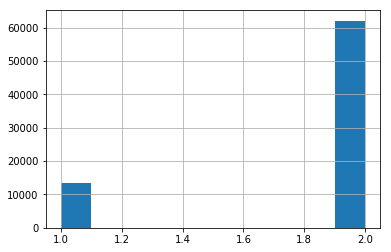

In [204]:
data['majority'].hist()

In [215]:
data[(data['docket'] == '10-694')]['justiceName'] == 'RBGinsburg'

74993    False
74994    False
74995    False
74996    False
74997     True
74998    False
74999    False
75000    False
75001    False
Name: justiceName, dtype: bool

In [220]:
def getDecision(justice,docket):
    return data[(data['docket'] == docket) & (data['justiceName'] == justice)]['vote']

In [221]:
getDecision('RBGinsburg','10-694')

74997    1.0
Name: vote, dtype: float64

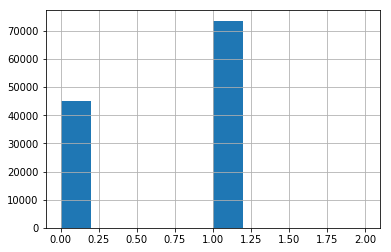

In [58]:
data['partyWinning'].hist()

In [61]:
data[data['docketId'] == 2015-14-114]

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement


In [2]:
import keras

/Users/mbaumer/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import nltk

In [7]:
#import sys
#sys.path.insert(0, '/Users/mbaumer/side_projects/ruth-bader-ginsbot/python/')
import vocab

In [9]:
emb_matrix, word2id, id2word = vocab.get_glove('/Users/mbaumer/side_projects/ruth-bader-ginsbot/data/glove/glove.6B.50d.txt',50)

  2%|▏         | 8372/400000 [00:00<00:09, 41848.52it/s]

Loading GLoVE vectors from file: /Users/mbaumer/side_projects/ruth-bader-ginsbot/data/glove/glove.6B.50d.txt


100%|██████████| 400000/400000 [00:09<00:00, 42532.57it/s]


In [3]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17473536/17464789 [==============================] - 3s 0us/step


KeyboardInterrupt: 

In [20]:
import keras

Using TensorFlow backend.


In [222]:
import pdfminer